In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import gridspec
import matplotlib.colors as colors

In [2]:
# Define colors
color_information = pd.read_csv('color_information.csv',skipinitialspace=True,header=0)
def model_color(model,kind): # kind ncl or py
    if kind == 'ncl':
        r = color_information[model][0]
        g = color_information[model][1]
        b = color_information[model][2]
    if kind == 'py':
        r = color_information[model][3]
        g = color_information[model][4]
        b = color_information[model][5]
    color = [r,g,b]
    return color

In [75]:
# observations
# I need to check these numbers
obs_historical=[0.7,0.9,1.1]
obs_mh = [0.3,0.5,0.9]
obs_lgm=[5,6,7]# PI - LGM
obs_lig=[0.5,1,1.5]
obs_mpwp=[2.5,3.25,4]
obs_eeco=[10,14,18]
def plotting_obs(obs):
    plt.errorbar([0.5],[obs[1]], yerr=[[obs[1]-obs[0]],[obs[2]-obs[1]]],marker='o',color='k',ms=12)

In [3]:
# information about periods and generations are available in sheet "Summary" in excel file "Figure 1.xlsx"
# I need to check ECS numbers 
def load_data(period,generation):
    f = pd.read_csv('csvfiles/%s_%s.csv'%(period,generation),header=0)
    dT = f['dT']
    model = f['models']
    ecs = f['ECS']
    DATA = {}
    for i in range(len(dT)):
        DATA[model[i]] = [ecs[i],dT[i]]
    return model, DATA
        

In [ ]:
# Periods & generations:
# historical : CMIP6 CMIP5
# MH : PMIP4 PMIP3
# LGM : PMIP4 PMIP3
# LIG : PMIP4
# MPWP : PlioMIP1 PlioMIP2
# EECO : DeepMIP

In [8]:
def plotting_dt(period,generation,loc):
    model,data = load_data(period,generation)
    for m in model:
        #plt.plot(loc,data[m][1],marker=marker,color=model_color(m,'py'),fillstyle='none',mew=3, ms=10,linestyle='None')
        plt.plot(loc,data[m][1],marker='o',color='b',alpha=0.5,mew=1, ms=7,linestyle='None')



    

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

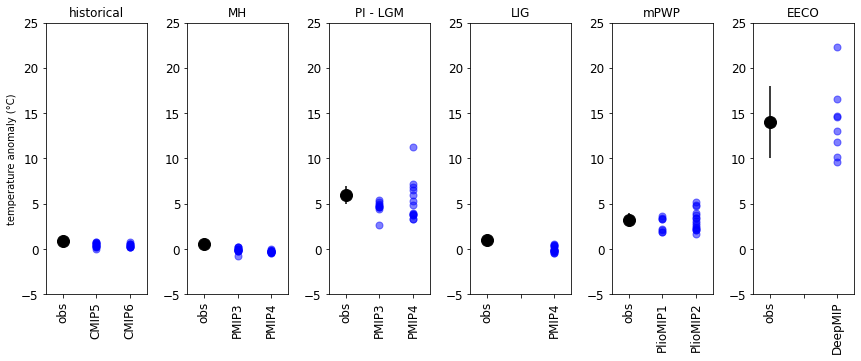

In [76]:
# loc: 0.5 for obs, 1.5 for PMIP3, 2.5 for PMIP4
# marker: "s" for PMIP3, "o" for PMIP4
plt.figure(figsize=(15,5))
gs = gridspec.GridSpec(1, 12, width_ratios=[1,6,1,6,1,6,1,6,1,6,1,6]) 
# historical
plt.subplot(gs[1])
plt.xlim([0,3])
plt.ylim([-5,25])
plt.title('historical',fontsize=12)
plotting_obs(obs_historical)
plotting_dt('CMIP5','historical',1.5)
plotting_dt('CMIP6','historical',2.5)
plt.xticks([0.5,1.5,2.5],['obs','CMIP5','CMIP6'],fontsize=12,rotation=90)
plt.yticks(fontsize=12)
plt.ylabel('temperature anomaly (%sC)'%(chr(176)))

#LIG
plt.subplot(gs[3])
plt.xlim([0,3])
plt.ylim([-5,25])
plt.title('MH',fontsize=12)
plotting_obs(obs_mh)
plotting_dt('PMIP3','MH',1.5)
plotting_dt('PMIP4','MH',2.5)
plt.xticks([0.5,1.5,2.5],['obs','PMIP3','PMIP4'],fontsize=12,rotation=90)
plt.yticks(fontsize=12)

#LGM
plt.subplot(gs[5])
plt.xlim([0,3])
plt.ylim([-5,25])
plt.title('PI - LGM',fontsize=12)
plotting_obs(obs_lgm)
plotting_dt('PMIP3','LGM',1.5)
plotting_dt('PMIP4','LGM',2.5)
plt.xticks([0.5,1.5,2.5],['obs','PMIP3','PMIP4'],fontsize=12,rotation=90)
plt.yticks(fontsize=12)

#LIG
plt.subplot(gs[7])
plt.xlim([0,3])
plt.ylim([-5,25])
plt.title('LIG',fontsize=12)
plotting_obs(obs_lig)
plotting_dt('PMIP4','LIG',2.5)
plt.xticks([0.5,1.5,2.5],['obs','','PMIP4'],fontsize=12,rotation=90)
plt.yticks(fontsize=12)

#mPWP
plt.subplot(gs[9])
plt.xlim([0,3])
plt.ylim([-5,25])
plt.title('mPWP',fontsize=12)
plotting_obs(obs_mpwp)
plotting_dt('PlioMIP1','mPWP',1.5)
plotting_dt('PlioMIP2','mPWP',2.5)
plt.xticks([0.5,1.5,2.5],['obs','PlioMIP1','PlioMIP2'],fontsize=12,rotation=90)
plt.yticks(fontsize=12)


#LIG
plt.subplot(gs[11])
plt.xlim([0,3])
plt.ylim([-5,25])
plt.title('EECO',fontsize=12)
plotting_obs(obs_eeco)
plotting_dt('DeepMIP','EECO',2.5)
plt.xticks([0.5,1.5,2.5],['obs','','DeepMIP'],fontsize=12,rotation=90)
plt.yticks(fontsize=12)

In [ ]:
# Use fixed y axis 
# give a idea about how warm the periods were
# BUT lose infolation during historical, MH and LIG

In [11]:
# Use MH as an example to plot different information
model_pmip4_mh,data_pmip4_mh = load_data('PMIP4','MH')
model_pmip3_mh,data_pmip3_mh = load_data('PMIP3','MH')
   
obs_mh = [0.3,0.5,0.9] # min, ave, max , 80%CI


([<matplotlib.axis.XTick at 0x7ff0763a8650>,
 [Text(0.5, 0, 'obs'), Text(1.5, 0, 'PMIP3'), Text(2.5, 0, 'PMIP4')])

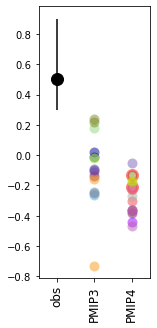

In [54]:
# option 1 : plot everything
# dot color represents model
# red edge means ECS > 5
# blue edge means ECS < 2

'''Strengths & Problems
# Good: include all information
# Good: can compare model generations
# Bad: include too much informaiton
# Bad: patterns are not clear

'''
plt.figure(figsize=(2,5))
plt.xlim([0,3])

for m in model_pmip4_mh:
    if 2 <= data_pmip4_mh[m][0] <= 5:
        plt.plot(2.5,data_pmip4_mh[m][1],marker='o',color=model_color(m,'py'),alpha=0.5, mec='none',ms=10,linestyle='None')
    if data_pmip4_mh[m][0] > 5:
        plt.plot(2.5,data_pmip4_mh[m][1],marker='o',color=model_color(m,'py'),alpha=0.5,mew=3,mec='r', ms=10,linestyle='None')
    if data_pmip4_mh[m][0] < 2:
        plt.plot(2.5,data_pmip4_mh[m][1],marker='o',color=model_color(m,'py'),alpha=0.5,mew=3,mec='b', ms=10,linestyle='None')
                
for m in model_pmip3_mh:
    if 2 <= data_pmip3_mh[m][0] <= 5:
        plt.plot(1.5,data_pmip3_mh[m][1],marker='o',color=model_color(m,'py'),alpha=0.5, mec='none',ms=10,linestyle='None')
    if data_pmip3_mh[m][0] > 5:
        plt.plot(1.5,data_pmip3_mh[m][1],marker='o',color=model_color(m,'py'),alpha=0.5,mew=3,mec='r', ms=10,linestyle='None')
    if data_pmip3_mh[m][0] < 2:
        plt.plot(1.5,data_pmip3_mh[m][1],marker='o',color=model_color(m,'py'),alpha=0.5,mew=3,mec='b', ms=10,linestyle='None')
    

plt.errorbar([0.5],[obs_mh[1]], yerr=[[obs_mh[1]-obs_mh[0]],[obs_mh[2]-obs_mh[1]]],marker='o',color='k',ms=12)
plt.xticks([0.5,1.5,2.5],['obs','PMIP3','PMIP4'],fontsize=12,rotation=90)


([<matplotlib.axis.XTick at 0x7ff075a17950>,
 [Text(0.5, 0, 'obs'), Text(1.5, 0, 'PMIP3'), Text(2.5, 0, 'PMIP4')])

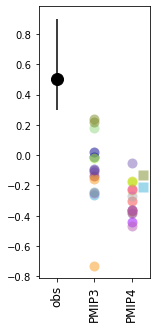

In [55]:
# option 2 : plot everything
# dot color represents model
# square means ECS > 5
# triange edge means ECS < 2

'''Strengths & Problems
# Good: include all information
# Good: can compare model generations
# Bad: include too much informaiton
# Bad: too many columns

'''
plt.figure(figsize=(2,5))
plt.xlim([0,3])

for m in model_pmip4_mh:
    if data_pmip4_mh[m][0] > 5:
        plt.plot(2.8,data_pmip4_mh[m][1],marker='s',color=model_color(m,'py'),alpha=0.5,mew=3,mec='none', ms=10,linestyle='None')
    if data_pmip4_mh[m][0] < 2:
        plt.plot(2.2,data_pmip4_mh[m][1],marker='^',color=model_color(m,'py'),alpha=0.5,mew=3,mec='none', ms=10,linestyle='None')
    if 2 <= data_pmip4_mh[m][0] <= 5:
        plt.plot(2.5,data_pmip4_mh[m][1],marker='o',color=model_color(m,'py'),alpha=0.5, mec='none',ms=10,linestyle='None')
                
for m in model_pmip3_mh:
    if data_pmip3_mh[m][0] > 5:
        plt.plot(1.8,data_pmip3_mh[m][1],marker='s',color=model_color(m,'py'),alpha=0.5,mew=3,mec='none', ms=10,linestyle='None')
    if data_pmip3_mh[m][0] < 2:
        plt.plot(1.2,data_pmip3_mh[m][1],marker='^',color=model_color(m,'py'),alpha=0.5,mew=3,mec='none', ms=10,linestyle='None')
    if 2 <= data_pmip3_mh[m][0] <= 5:
        plt.plot(1.5,data_pmip3_mh[m][1],marker='o',color=model_color(m,'py'),alpha=0.5, mec='none',ms=10,linestyle='None')


plt.errorbar([0.5],[obs_mh[1]], yerr=[[obs_mh[1]-obs_mh[0]],[obs_mh[2]-obs_mh[1]]],marker='o',color='k',ms=12)
plt.xticks([0.5,1.5,2.5],['obs','PMIP3','PMIP4'],fontsize=12,rotation=90)

([<matplotlib.axis.XTick at 0x7ff07465fa50>,
 [Text(0.5, 0, 'obs'), Text(1.5, 0, 'PMIP3'), Text(2.5, 0, 'PMIP4')])

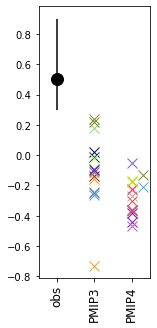

In [56]:

plt.figure(figsize=(2,5))
plt.xlim([0,3])

for m in model_pmip4_mh:
    if data_pmip4_mh[m][0] > 5:
        plt.plot(2.8,data_pmip4_mh[m][1],marker='x',color=model_color(m,'py'),mew=1, ms=10,linestyle='None')
    if data_pmip4_mh[m][0] < 2:
        plt.plot(2.2,data_pmip4_mh[m][1],marker='x',color=model_color(m,'py'),mew=1, ms=10,linestyle='None')
    if 2 <= data_pmip4_mh[m][0] <= 5:
        plt.plot(2.5,data_pmip4_mh[m][1],marker='x',color=model_color(m,'py'), mew=1,ms=10,linestyle='None')
                
for m in model_pmip3_mh:
    if data_pmip3_mh[m][0] > 5:
        plt.plot(1.8,data_pmip3_mh[m][1],marker='x',color=model_color(m,'py'),mew=1,ms=10,linestyle='None')
    if data_pmip3_mh[m][0] < 2:
        plt.plot(1.2,data_pmip3_mh[m][1],marker='x',color=model_color(m,'py'),mew=1, ms=10,linestyle='None')
    if 2 <= data_pmip3_mh[m][0] <= 5:
        plt.plot(1.5,data_pmip3_mh[m][1],marker='x',color=model_color(m,'py'),mew=1,ms=10,linestyle='None')


plt.errorbar([0.5],[obs_mh[1]], yerr=[[obs_mh[1]-obs_mh[0]],[obs_mh[2]-obs_mh[1]]],marker='o',color='k',ms=12)
plt.xticks([0.5,1.5,2.5],['obs','PMIP3','PMIP4'],fontsize=12,rotation=90)

([<matplotlib.axis.XTick at 0x7ff075c68110>,
 [Text(1.5, 0, 'PMIP3'), Text(2.5, 0, 'PMIP4')])

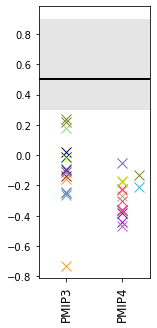

In [43]:
plt.figure(figsize=(2,5))
plt.xlim([1,3])

for m in model_pmip4_mh:
    if data_pmip4_mh[m][0] > 5:
        plt.plot(2.8,data_pmip4_mh[m][1],marker='x',color=model_color(m,'py'),mew=1, ms=10,linestyle='None')
    if data_pmip4_mh[m][0] < 2:
        plt.plot(2.2,data_pmip4_mh[m][1],marker='x',color=model_color(m,'py'),mew=1, ms=10,linestyle='None')
    if 2 <= data_pmip4_mh[m][0] <= 5:
        plt.plot(2.5,data_pmip4_mh[m][1],marker='x',color=model_color(m,'py'), mew=1,ms=10,linestyle='None')
                
for m in model_pmip3_mh:
    if data_pmip3_mh[m][0] > 5:
        plt.plot(1.8,data_pmip3_mh[m][1],marker='x',color=model_color(m,'py'),mew=1,ms=10,linestyle='None')
    if data_pmip3_mh[m][0] < 2:
        plt.plot(1.2,data_pmip3_mh[m][1],marker='x',color=model_color(m,'py'),mew=1, ms=10,linestyle='None')
    if 2 <= data_pmip3_mh[m][0] <= 5:
        plt.plot(1.5,data_pmip3_mh[m][1],marker='x',color=model_color(m,'py'),mew=1,ms=10,linestyle='None')
#obs
plt.plot([1,3],[obs_mh[1],obs_mh[1]],'k',lw=2)
plt.fill_between([1,3],[0.3,0.3],[0.9,0.9],facecolor='k', alpha=0.1)
#plt.errorbar([0.5],[obs_mh[1]], yerr=[[obs_mh[0]],[obs_mh[2]]],marker='o',color='k',ms=12)
plt.xticks([1.5,2.5],['PMIP3','PMIP4'],fontsize=12,rotation=90)